### **策略梯度方法**

策略梯度是一类**直接优化策略**的强化学习算法，其核心思想是通过梯度上升方式直接对参数化的策略 $\pi_\theta(a|s)$ 进行优化，以最大化期望回报。

#### 1. 目标函数

定义策略 $\pi_\theta$ 的目标函数为从初始状态出发的期望累积回报：

$$
J(\theta) = \mathbb{E}_{\tau \sim \pi_\theta} \left[ \sum_{t=0}^{\infty} \gamma^t r_t \right]
$$

其中：
- $\tau = (s_0, a_0, r_0, s_1, a_1, r_1, \dots)$ 是一条轨迹（trajectory），
- $\gamma \in [0, 1]$ 是折扣因子，
- 期望是对由策略 $\pi_\theta$ 生成的所有轨迹取的。

#### 2. 策略梯度定理

策略梯度定理指出，目标函数关于策略参数 $\theta$ 的梯度为：

$$
\nabla_\theta J(\theta) = \mathbb{E}_{\tau \sim \pi_\theta} \left[ \sum_{t=0}^{\infty} \nabla_\theta \log \pi_\theta(a_t|s_t) \, Q^{\pi_\theta}(s_t, a_t) \right]
$$

其中 $Q^{\pi_\theta}(s_t, a_t)$ 是在策略 $\pi_\theta$ 下从状态-动作对 $(s_t, a_t)$ 出发的**真实动作价值函数**。

为降低方差，实践中常用**优势函数** $A^{\pi_\theta}(s_t, a_t) = Q^{\pi_\theta}(s_t, a_t) - V^{\pi_\theta}(s_t)$ 替代 $Q$，因为：

$$
\mathbb{E}_{a \sim \pi_\theta} \left[ \nabla_\theta \log \pi_\theta(a|s) \cdot b(s) \right] = b(s) \cdot \nabla_\theta \underbrace{\mathbb{E}_{a \sim \pi_\theta} [\log \pi_\theta(a|s)]}_{=1} = 0
$$

所以加减任意只依赖于状态的基线 $b(s)$（如 $V^{\pi_\theta}(s)$）不会改变梯度的期望，但可显著降低方差。

因此，常用梯度估计形式为：

$$
\nabla_\theta J(\theta) \approx \frac{1}{N} \sum_{i=1}^{N} \sum_{t=0}^{T} \nabla_\theta \log \pi_\theta(a_t^{(i)}|s_t^{(i)}) \, A^{\pi_\theta}(s_t^{(i)}, a_t^{(i)})
$$

### REINFORCE介绍

REINFORCE 是最基础的策略梯度算法，使用完整 episode 的回报作为 $Q$ 的无偏估计：

$$
\nabla_\theta J(\theta) \approx \frac{1}{N} \sum_{i=1}^{N} \sum_{t=0}^{T_i} \nabla_\theta \log \pi_\theta(a_t^{(i)}|s_t^{(i)}) \, G_t^{(i)}
$$

其中 $G_t^{(i)} = \sum_{k=t}^{T_i} \gamma^{k-t} r_k^{(i)}$ 是第 $i$ 条轨迹中从时间 $t$ 开始的**实际回报**。

参数更新采用梯度上升：

$$
\theta \leftarrow \theta + \alpha \, \nabla_\theta J(\theta)
$$

其中 $\alpha > 0$ 是学习率。

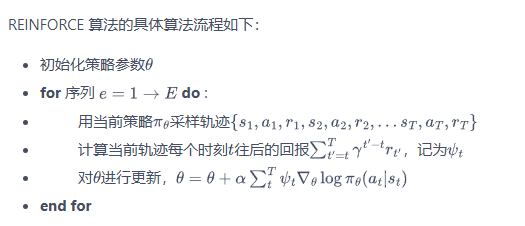

### Generalized Advantage Estimation(GAE，广义优势估计)

通过指数加权平均多步时序差分（TD）误差，在偏差（bias）与方差（variance）之间实现平滑权衡，为策略梯度算法提供稳定、高效的优势函数估计。

在策略梯度方法中，目标函数梯度为：

$$
\nabla_\theta J(\theta) \propto \mathbb{E}_{s,a} \left[ A^{\pi_\theta}(s,a) \nabla_\theta \log \pi_\theta(a|s) \right]
$$

其中 $A^{\pi}(s,a) = Q^{\pi}(s,a) - V^{\pi}(s)$ 是**优势函数**，衡量动作 $a$ 相对于当前策略平均表现的“超额收益”。

---

**公式：**

$$
\boxed{
\hat{A}_t^{\text{GAE}(\lambda)} = (1-\lambda) \sum_{k=1}^{\infty} \lambda^{k-1} \, A_t^{(k)}
}
$$

其中 **$k$ 步优势估计** 定义为：

$$
A_t^{(k)} = \underbrace{\left( \sum_{l=0}^{k-1} \gamma^l r_{t+l} + \gamma^k V(s_{t+k}) \right)}_{Q^{(k)}(s_t,a_t)} - V(s_t)
$$

将 $(1-\lambda)\lambda^{k-1}$ 视为**几何分布**的概率质量函数，即：以 $(1-\lambda)\lambda^{k-1}$ 为选择 $A_t^{(k-1)}$ 的权重，实现通过控制 $\lambda$ 来实现**平滑平衡**方差和偏差；**在每一步以概率 $(1-\lambda)$ 终止视野，以概率 $\lambda$ 继续向前看**。

上式通过变换，可变为以下形式的公式：

$$
\boxed{
\hat{A}_t^{\text{GAE}(\gamma,\lambda)} = \sum_{l=0}^{\infty} (\gamma\lambda)^l \, \delta_{t+l}
}
$$

其中 **TD 误差** 定义为：

$$
\delta_t = r_t + \gamma V(s_{t+1}) - V(s_t)
$$

---

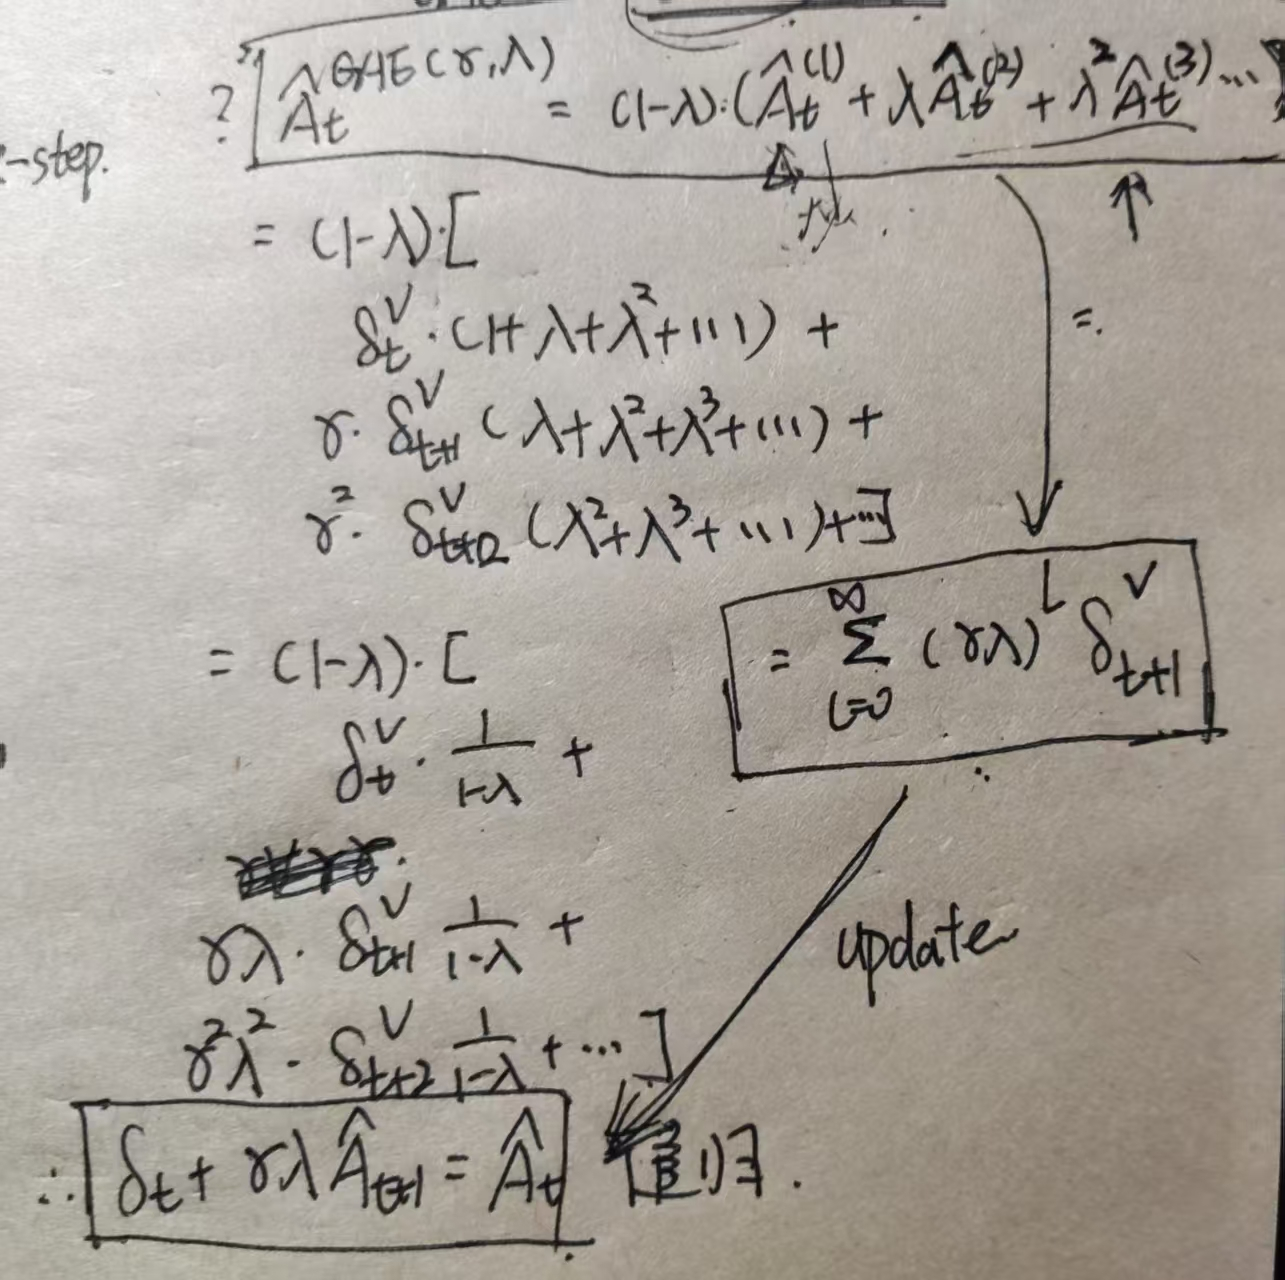
